## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [203]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix


In [180]:
uci_students = pd.read_csv("students-data.csv",delimiter=";")
uci_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [181]:
# Index (0) name change to 'number'.

uci_students['number'] = uci_students.index
uci_students.set_index('number',inplace=True)
uci_students.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [182]:
# Missing Values Check

#sum(uci_students.isnull().values)
print("The total NOTNULL values in columns is " , sum([True for idx,row in uci_students.iterrows() if any(row.isnull())]))


The total NOTNULL values in columns is  0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [183]:
#print(uci_students.info())

print("Rows and columns of the dataset are ", uci_students.shape)
print("The column names of the non-numerical DataTypes of the Students Dataset are below.")
uci_students.select_dtypes(exclude=['int64']).columns

Rows and columns of the dataset are  (395, 33)
The column names of the non-numerical DataTypes of the Students Dataset are below.


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
threshold_n= 0.99
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
print(sel)
sel_var=sel.fit_transform(uci_students)

#uci_students[uci_students.columns[sel.get_support(indices=True)]] 

VarianceThreshold(threshold=0.00990000000000001)


ValueError: could not convert string to float: 'no'

In [ ]:
uci_students[:, uci_students.variances_ > threshold]

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [184]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

uci_students["sex"] = le.fit_transform(uci_students["sex"])
uci_students["Pstatus"] = le.fit_transform(uci_students["Pstatus"])
uci_students["Mjob"] = le.fit_transform(uci_students["Mjob"])
uci_students["Fjob"] = le.fit_transform(uci_students["Fjob"])
uci_students["famsize"] = le.fit_transform(uci_students["famsize"])
uci_students["address"] = le.fit_transform(uci_students["address"])
uci_students["school"] = le.fit_transform(uci_students["school"])
uci_students["reason"] = le.fit_transform(uci_students["reason"])
uci_students["guardian"] = le.fit_transform(uci_students["guardian"])

uci_students["schoolsup"] = le.fit_transform(uci_students["schoolsup"])
uci_students["famsup"] = le.fit_transform(uci_students["famsup"])
uci_students["paid"] = le.fit_transform(uci_students["paid"])
uci_students["activities"] = le.fit_transform(uci_students["activities"])
uci_students["nursery"] = le.fit_transform(uci_students["nursery"])
uci_students["higher"] = le.fit_transform(uci_students["higher"])
uci_students["internet"] = le.fit_transform(uci_students["internet"])
uci_students["romantic"] = le.fit_transform(uci_students["romantic"])

uci_students.head(5)
#uci_students["paid"].head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [185]:
#type(uci_students['G1'])

for index, row in uci_students.iterrows():
    print(row['G1'])
    if (row['G1'] >=10):
        row['G1'] = 1
    else: 
        row['G1'] = 0
    if (row['G2'] >=10):
        row['G2'] = 1
    else: 
        row['G2'] = 0
    if (row['G3'] >=10):
        row['G3'] = 1
    else: 
        row['G3'] = 0
            
uci_students.head(10)

5
5
7
15
6
15
12
6
16
14
10
10
14
10
14
14
13
8
6
8
13
12
15
13
10
6
12
15
11
10
9
17
17
8
12
8
15
15
12
14
7
12
19
8
10
8
11
19
15
7
12
11
11
8
10
8
14
14
9
15
10
10
8
10
10
16
13
7
8
16
13
10
8
12
11
9
11
11
8
5
10
11
7
15
9
7
8
13
11
8
7
16
7
11
11
7
11
8
11
7
7
16
10
7
16
10
7
16
10
14
18
7
10
18
9
15
11
13
9
14
16
16
13
14
8
13
7
7
7
18
12
8
10
12
9
11
10
4
14
16
7
9
9
14
5
8
6
10
7
8
6
12
10
5
11
11
16
9
17
10
7
5
7
10
5
12
10
14
6
14
6
13
13
8
10
10
13
6
10
10
9
12
16
9
12
12
11
15
8
8
11
8
7
8
13
14
17
9
18
9
16
8
9
7
10
10
7
11
9
7
8
12
12
6
8
14
6
6
7
9
6
6
16
12
13
9
16
12
10
12
13
11
11
14
9
11
14
13
13
7
12
10
6
13
7
18
12
6
3
13
6
7
6
8
8
7
14
11
15
10
17
8
13
10
9
17
9
12
10
6
9
15
11
15
10
12
10
9
9
10
8
11
12
8
10
12
18
13
15
15
12
15
12
18
14
14
10
10
14
16
12
11
15
17
15
14
17
8
15
12
9
14
13
13
15
13
8
9
11
11
13
11
11
12
16
9
14
11
10
14
9
12
7
8
10
16
14
7
16
9
11
10
16
9
11
13
16
10
13
11
8
13
8
8
13
10
12
12
10
18
13
13
11
16
12
10
13
7
11
14
7
14
13
6
19
8
15
8

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [186]:
y=uci_students['G3']
X=uci_students.drop('G3',axis=1)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [187]:
print(uci_students.corr())

              school       sex       age   address   famsize   Pstatus  \
school      1.000000 -0.012286  0.377610 -0.279797  0.064866  0.045923   
sex        -0.012286  1.000000 -0.028606 -0.028504  0.089862  0.023443   
age         0.377610 -0.028606  1.000000 -0.146722  0.037847  0.029598   
address    -0.279797 -0.028504 -0.146722  1.000000  0.072472 -0.042572   
famsize     0.064866  0.089862  0.037847  0.072472  1.000000 -0.149612   
Pstatus     0.045923  0.023443  0.029598 -0.042572 -0.149612  1.000000   
Medu       -0.133333  0.078228 -0.163658  0.138804 -0.043068 -0.123565   
Fedu       -0.079807  0.034878 -0.163438  0.072178 -0.058879 -0.088730   
Mjob       -0.056670  0.191421 -0.069104  0.108818  0.071386 -0.054476   
Fjob        0.018974  0.084957 -0.035191 -0.001911 -0.084448  0.033892   
reason     -0.090010 -0.095867 -0.015337 -0.047891 -0.019212 -0.003553   
guardian    0.011109 -0.071343  0.290485 -0.044512 -0.002718 -0.108715   
traveltime  0.242308  0.059722  0.0706


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [188]:
print(uci_students.shape)
300/395

(395, 33)


0.759493670886076

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [190]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9191919191919192


In [191]:
print(metrics.confusion_matrix(y_test, y_predict))

[[28  3]
 [ 5 63]]


# Naive bayes with Iris data

### Import Iris.csv

In [193]:
iris = pd.read_csv("Iris.csv")
iris.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [195]:
y=iris['Class']
X=iris.drop('Class',axis=1)

### Find the distribution of target variable (Class)

In [196]:
iris.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

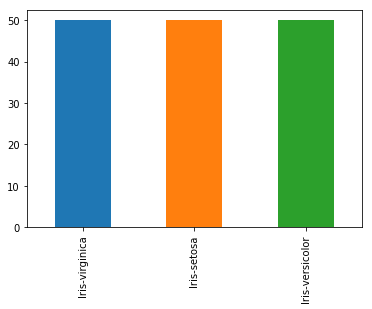

In [199]:
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

### Summary Statistics and explain insights for at least 2 variables

### Correlation among all variables and give your insights

In [200]:
iris.corr

<bound method DataFrame.corr of      Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8       

### Split data in Training and Validation in 80:20

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [204]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [207]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30



### Print Accuracy and Confusion Matrix and Conclude your findings

In [206]:
print(metrics.confusion_matrix(expected, predicted))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
